In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
df['higher'].value_counts()

higher
yes    580
no      69
Name: count, dtype: int64

In [10]:
df['sex'] = df['sex'].apply(lambda row: 1 if row == 'M' else 0)
df['address'] = df['address'].apply(lambda row: 1 if row == 'R' else 0)
df['famsize'] = df['famsize'].apply(lambda row: 1 if row == 'GT3' else 0)
df['Pstatus'] = df['Pstatus'].apply(lambda row: 1 if row == 'A' else 0)
df['school'] = df['school'].apply(lambda row: 1 if row == 'GP' else 0)
df['schoolsup'].value_counts()

schoolsup
no     581
yes     68
Name: count, dtype: int64

In [11]:
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_data = encoder.fit_transform(df[['Mjob', 'Fjob', 'reason', 'guardian']])
encoded_columns = encoder.get_feature_names_out(input_features=['Mjob', 'Fjob', 'reason', 'guardian'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'],inplace=True)
df_3 = df.join(encoded_df)

In [13]:
def transform_y(x):
  if x == 'no':
    return 0
  else:
    return 1

In [14]:
columns_yn = [ 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
df_3[columns_yn] = df_3[columns_yn].applymap(lambda x: transform_y(x))
df=df_3

C:\Users\tomad\AppData\Local\Temp\ipykernel_5800\3654535902.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_3[columns_yn] = df_3[columns_yn].applymap(lambda x: transform_y(x))


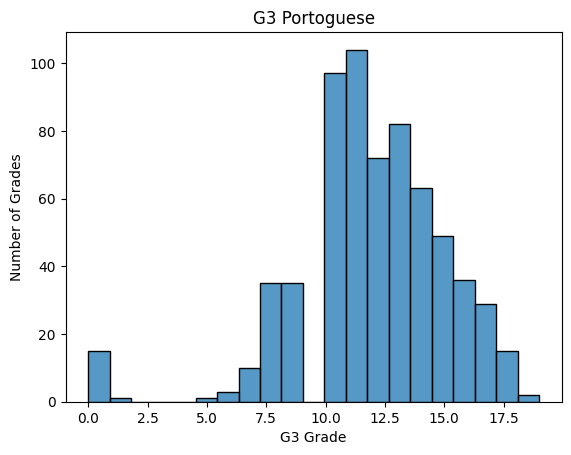

In [15]:
sns_plot = sns.histplot(df["G3"])
sns_plot.set(title='G3 Portoguese', )
sns_plot.set(xlabel='G3 Grade', ylabel='Number of Grades')
fig = sns_plot.get_figure()
fig.savefig("images/por/G3_Hist.png")

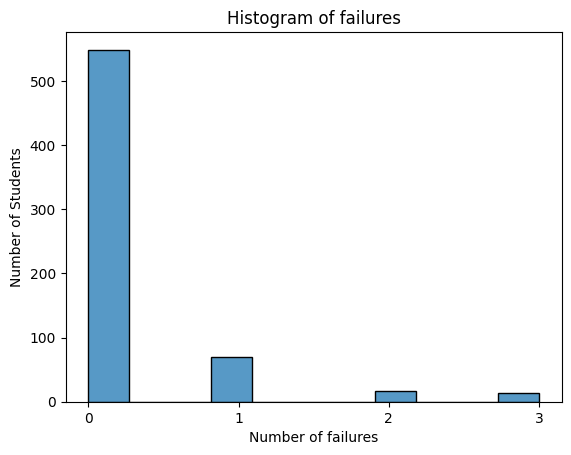

In [16]:
sns_plot = sns.histplot(df["failures"])
sns_plot.set(title='Histogram of failures', )
sns_plot.set(xlabel='Number of failures', ylabel='Number of Students')
sns_plot.set_xticks([0,1,2,3])
fig = sns_plot.get_figure()
fig.savefig("images/por/failures_hist.png")

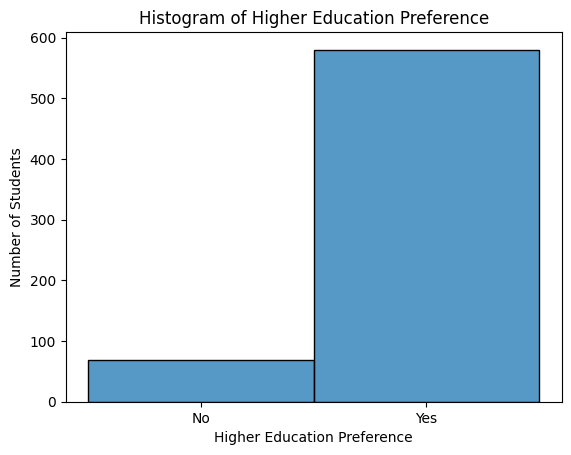

In [17]:
sns_plot = sns.histplot(df["higher"], bins=[-0.5, 0.5, 1.5], discrete=True)
sns_plot.set(title='Histogram of Higher Education Preference')
sns_plot.set(xlabel='Higher Education Preference', ylabel='Number of Students')
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['No', 'Yes'])
fig = sns_plot.get_figure()
fig.savefig("images/por/higher_education_hist.png")
plt.show()

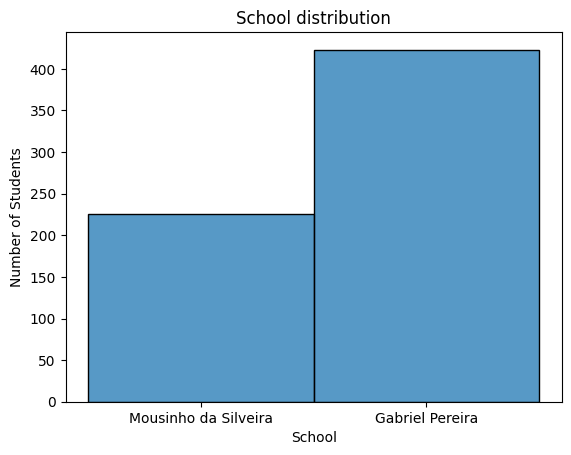

In [18]:
sns_plot = sns.histplot(df["school"], bins=[-0.5, 0.5, 1.5], discrete=True)
sns_plot.set(title='School distribution')
sns_plot.set(xlabel='School', ylabel='Number of Students')
sns_plot.set_xticks([0, 1])
sns_plot.set_xticklabels(['Mousinho da Silveira', 'Gabriel Pereira'])
fig = sns_plot.get_figure()
fig.savefig("images/por/Schooldistribution.png")
plt.show()

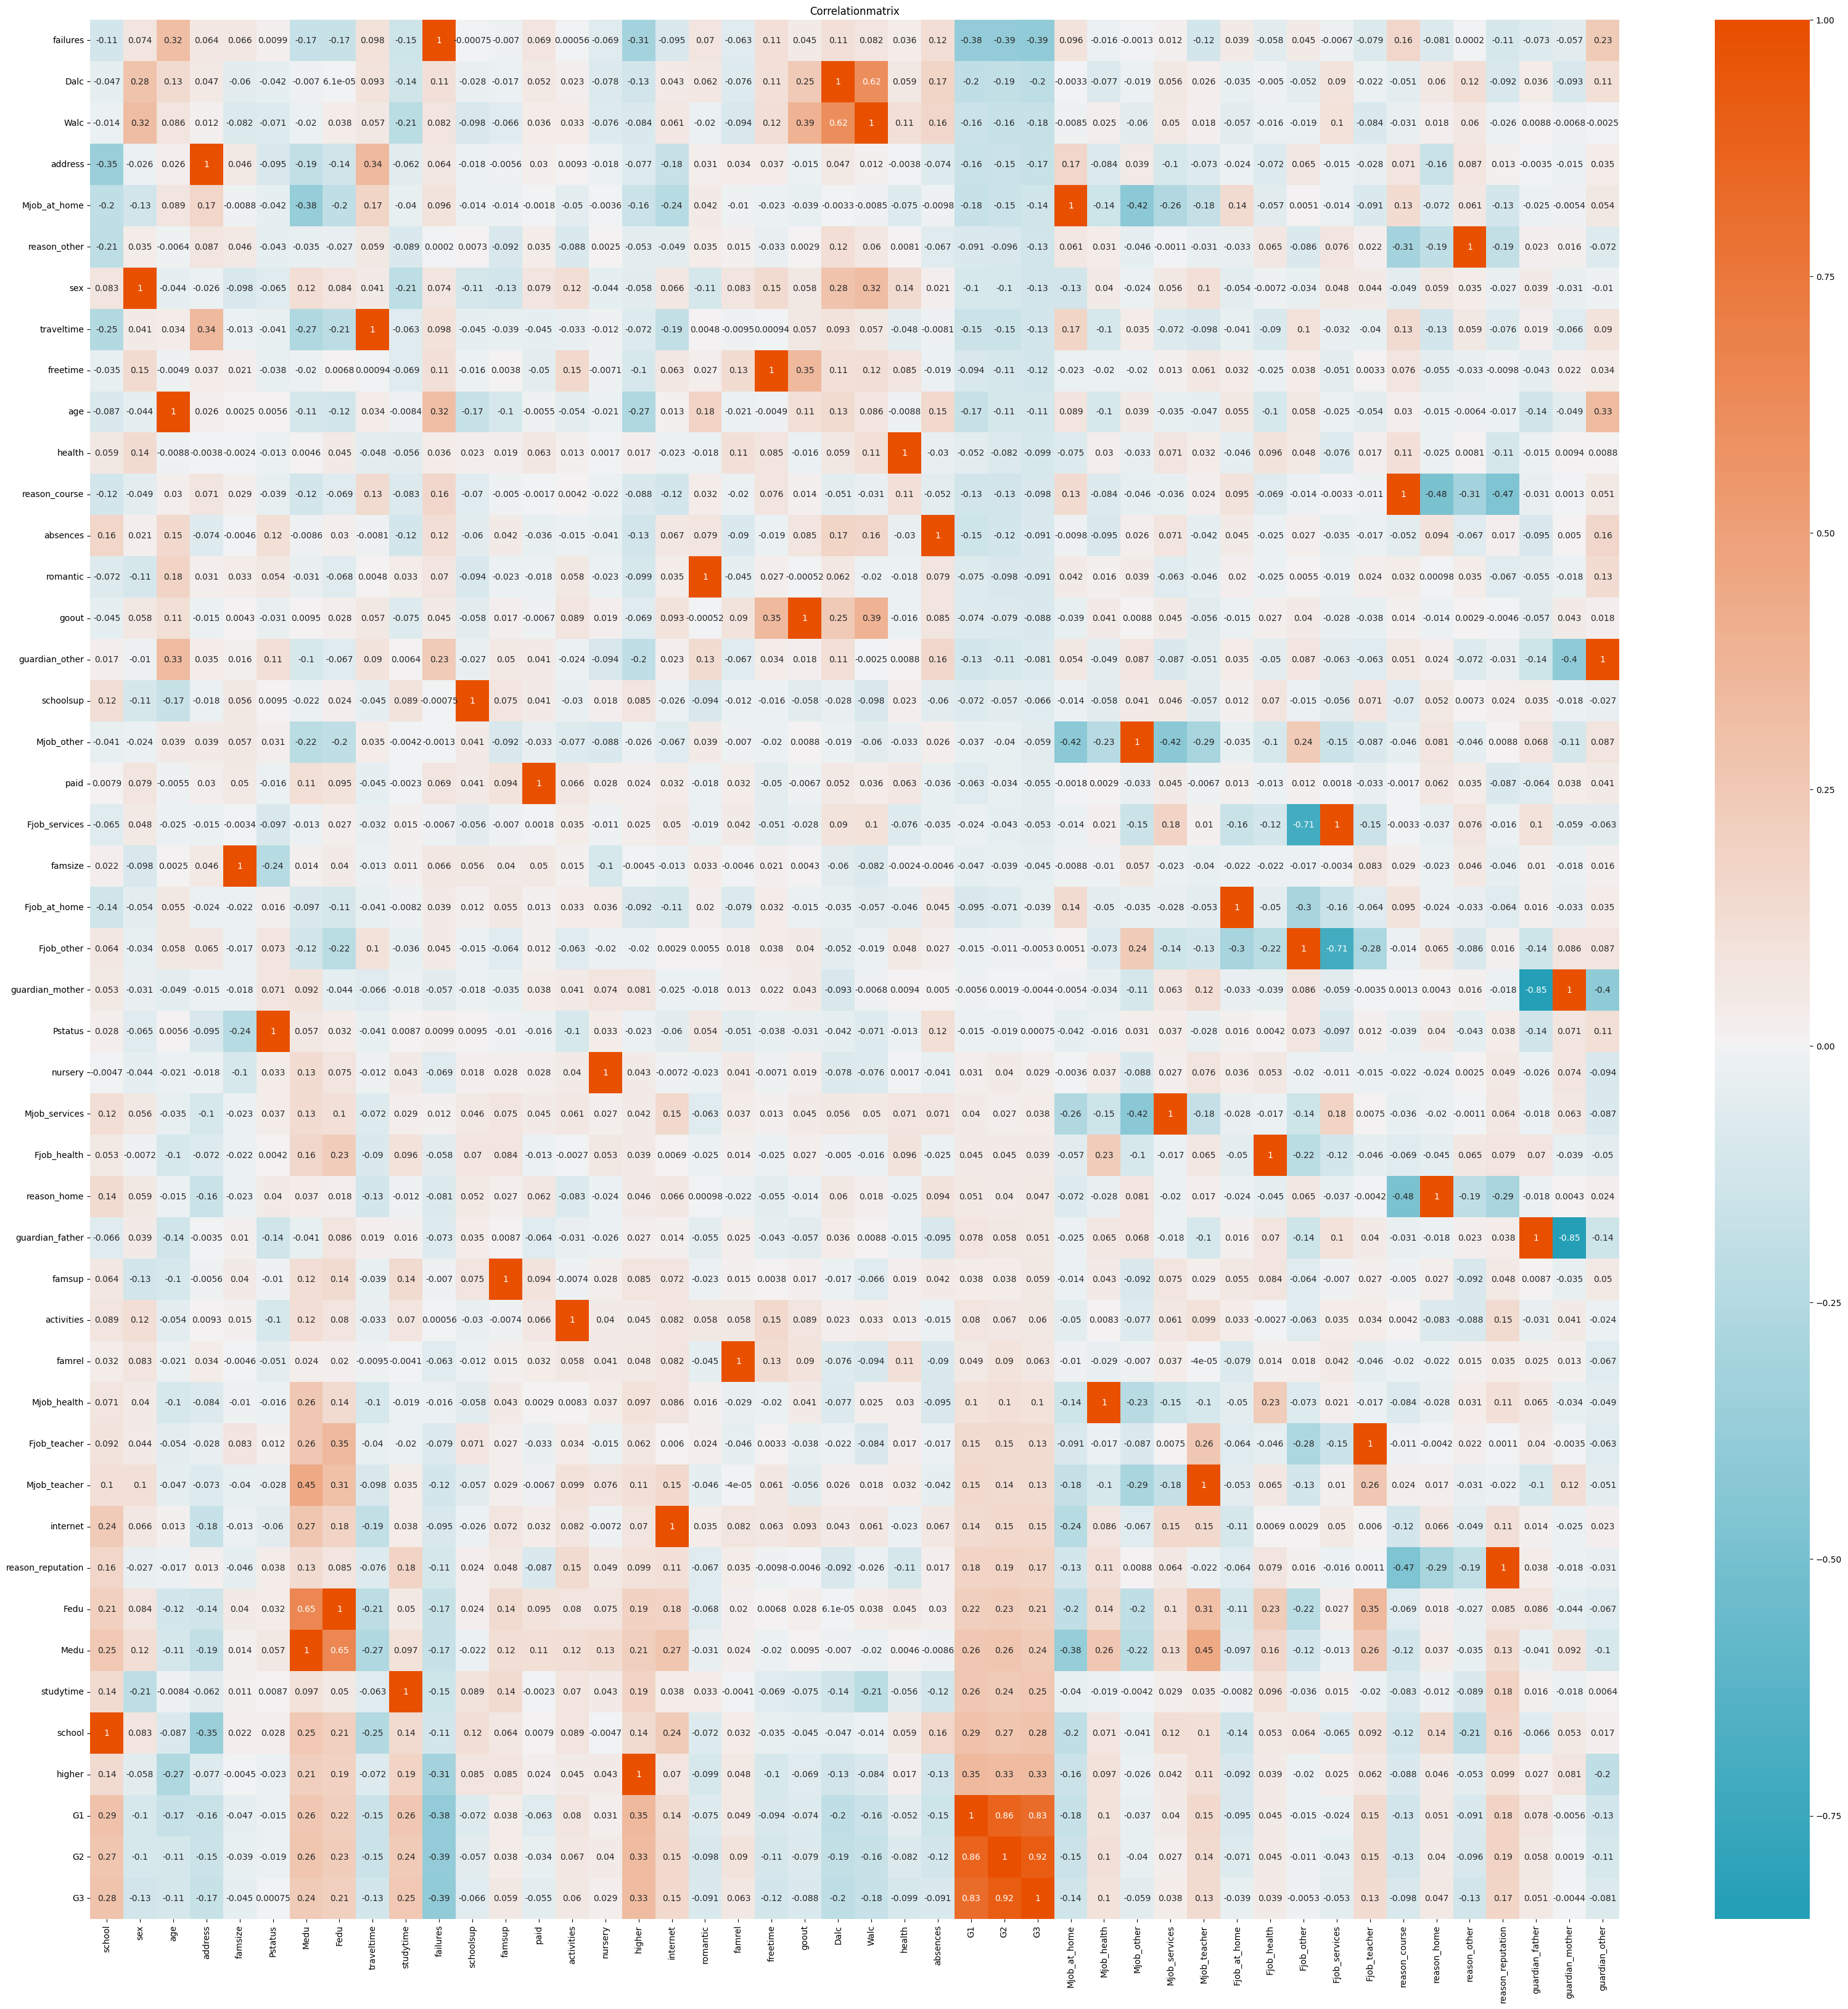

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 40))
cmap = sns.diverging_palette(220, 20, s=100, l=55, as_cmap=True)
sns_plot = sns.heatmap(correlation_matrix.sort_values('G3', axis=0), annot=True, cmap=cmap, center=0)
sns_plot.set(title='Correlationmatrix', )
fig = sns_plot.get_figure()
fig.savefig("images/por/Correlationmatrix.png")
plt.show()

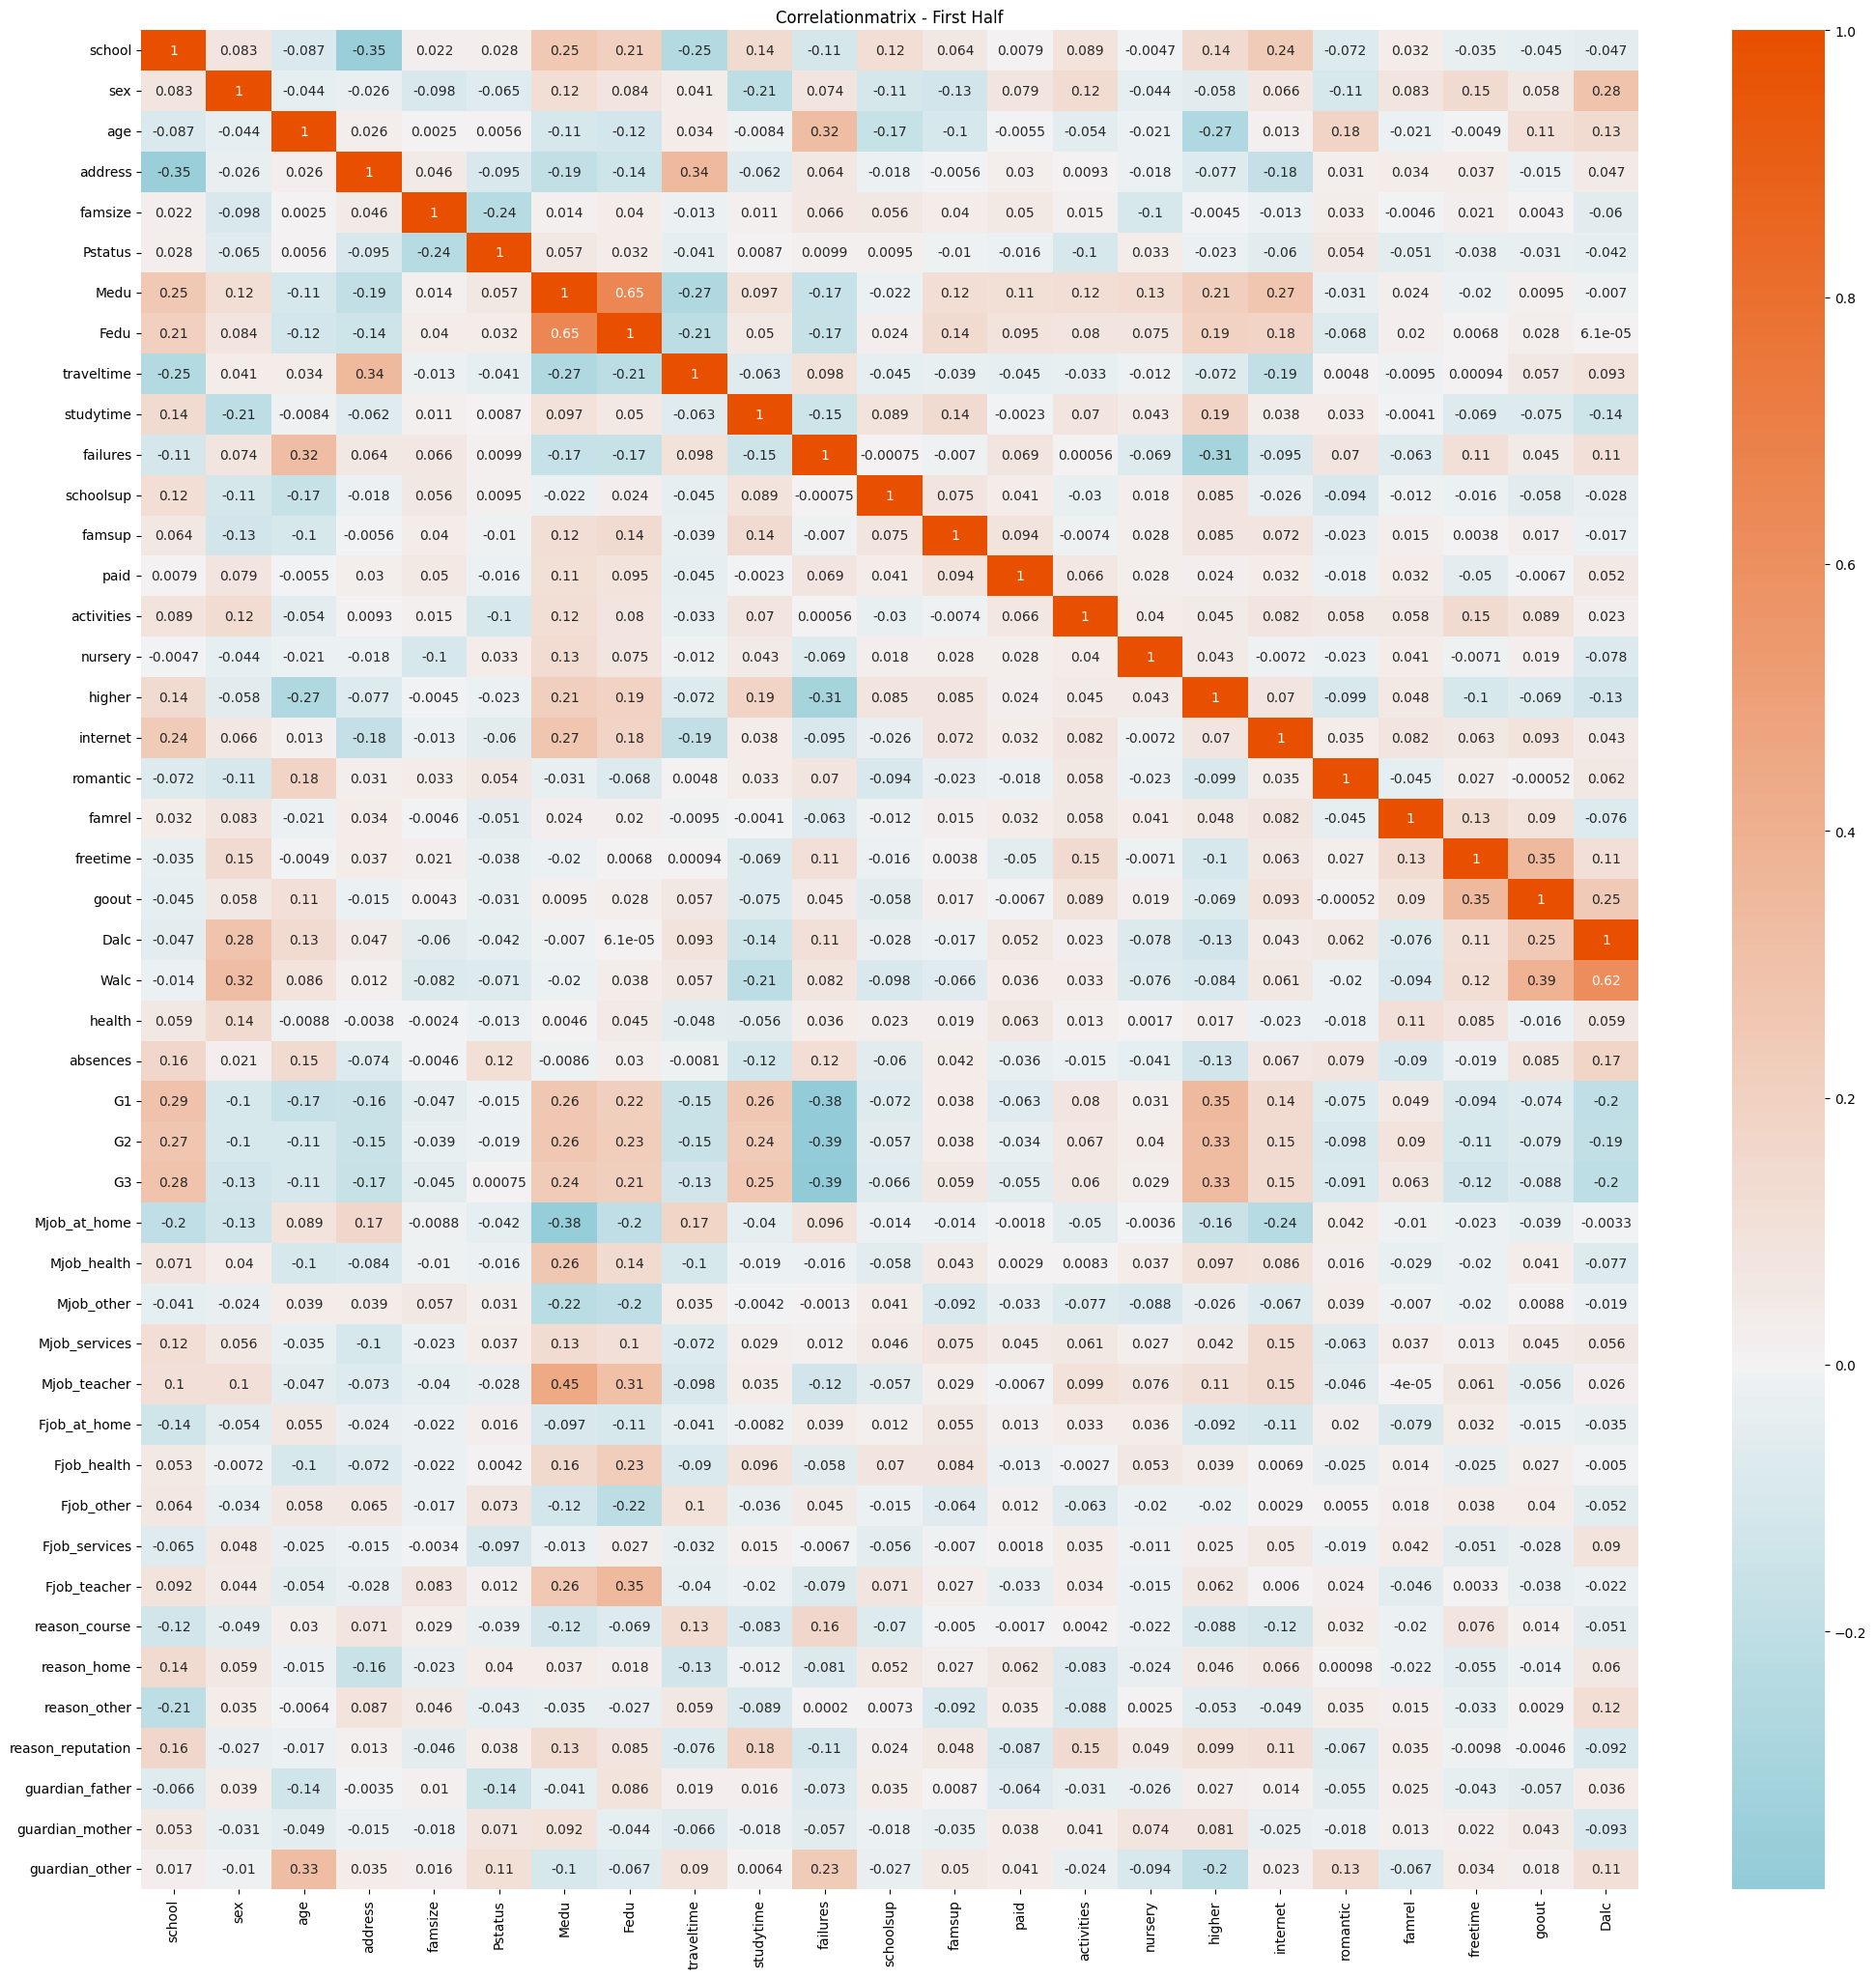

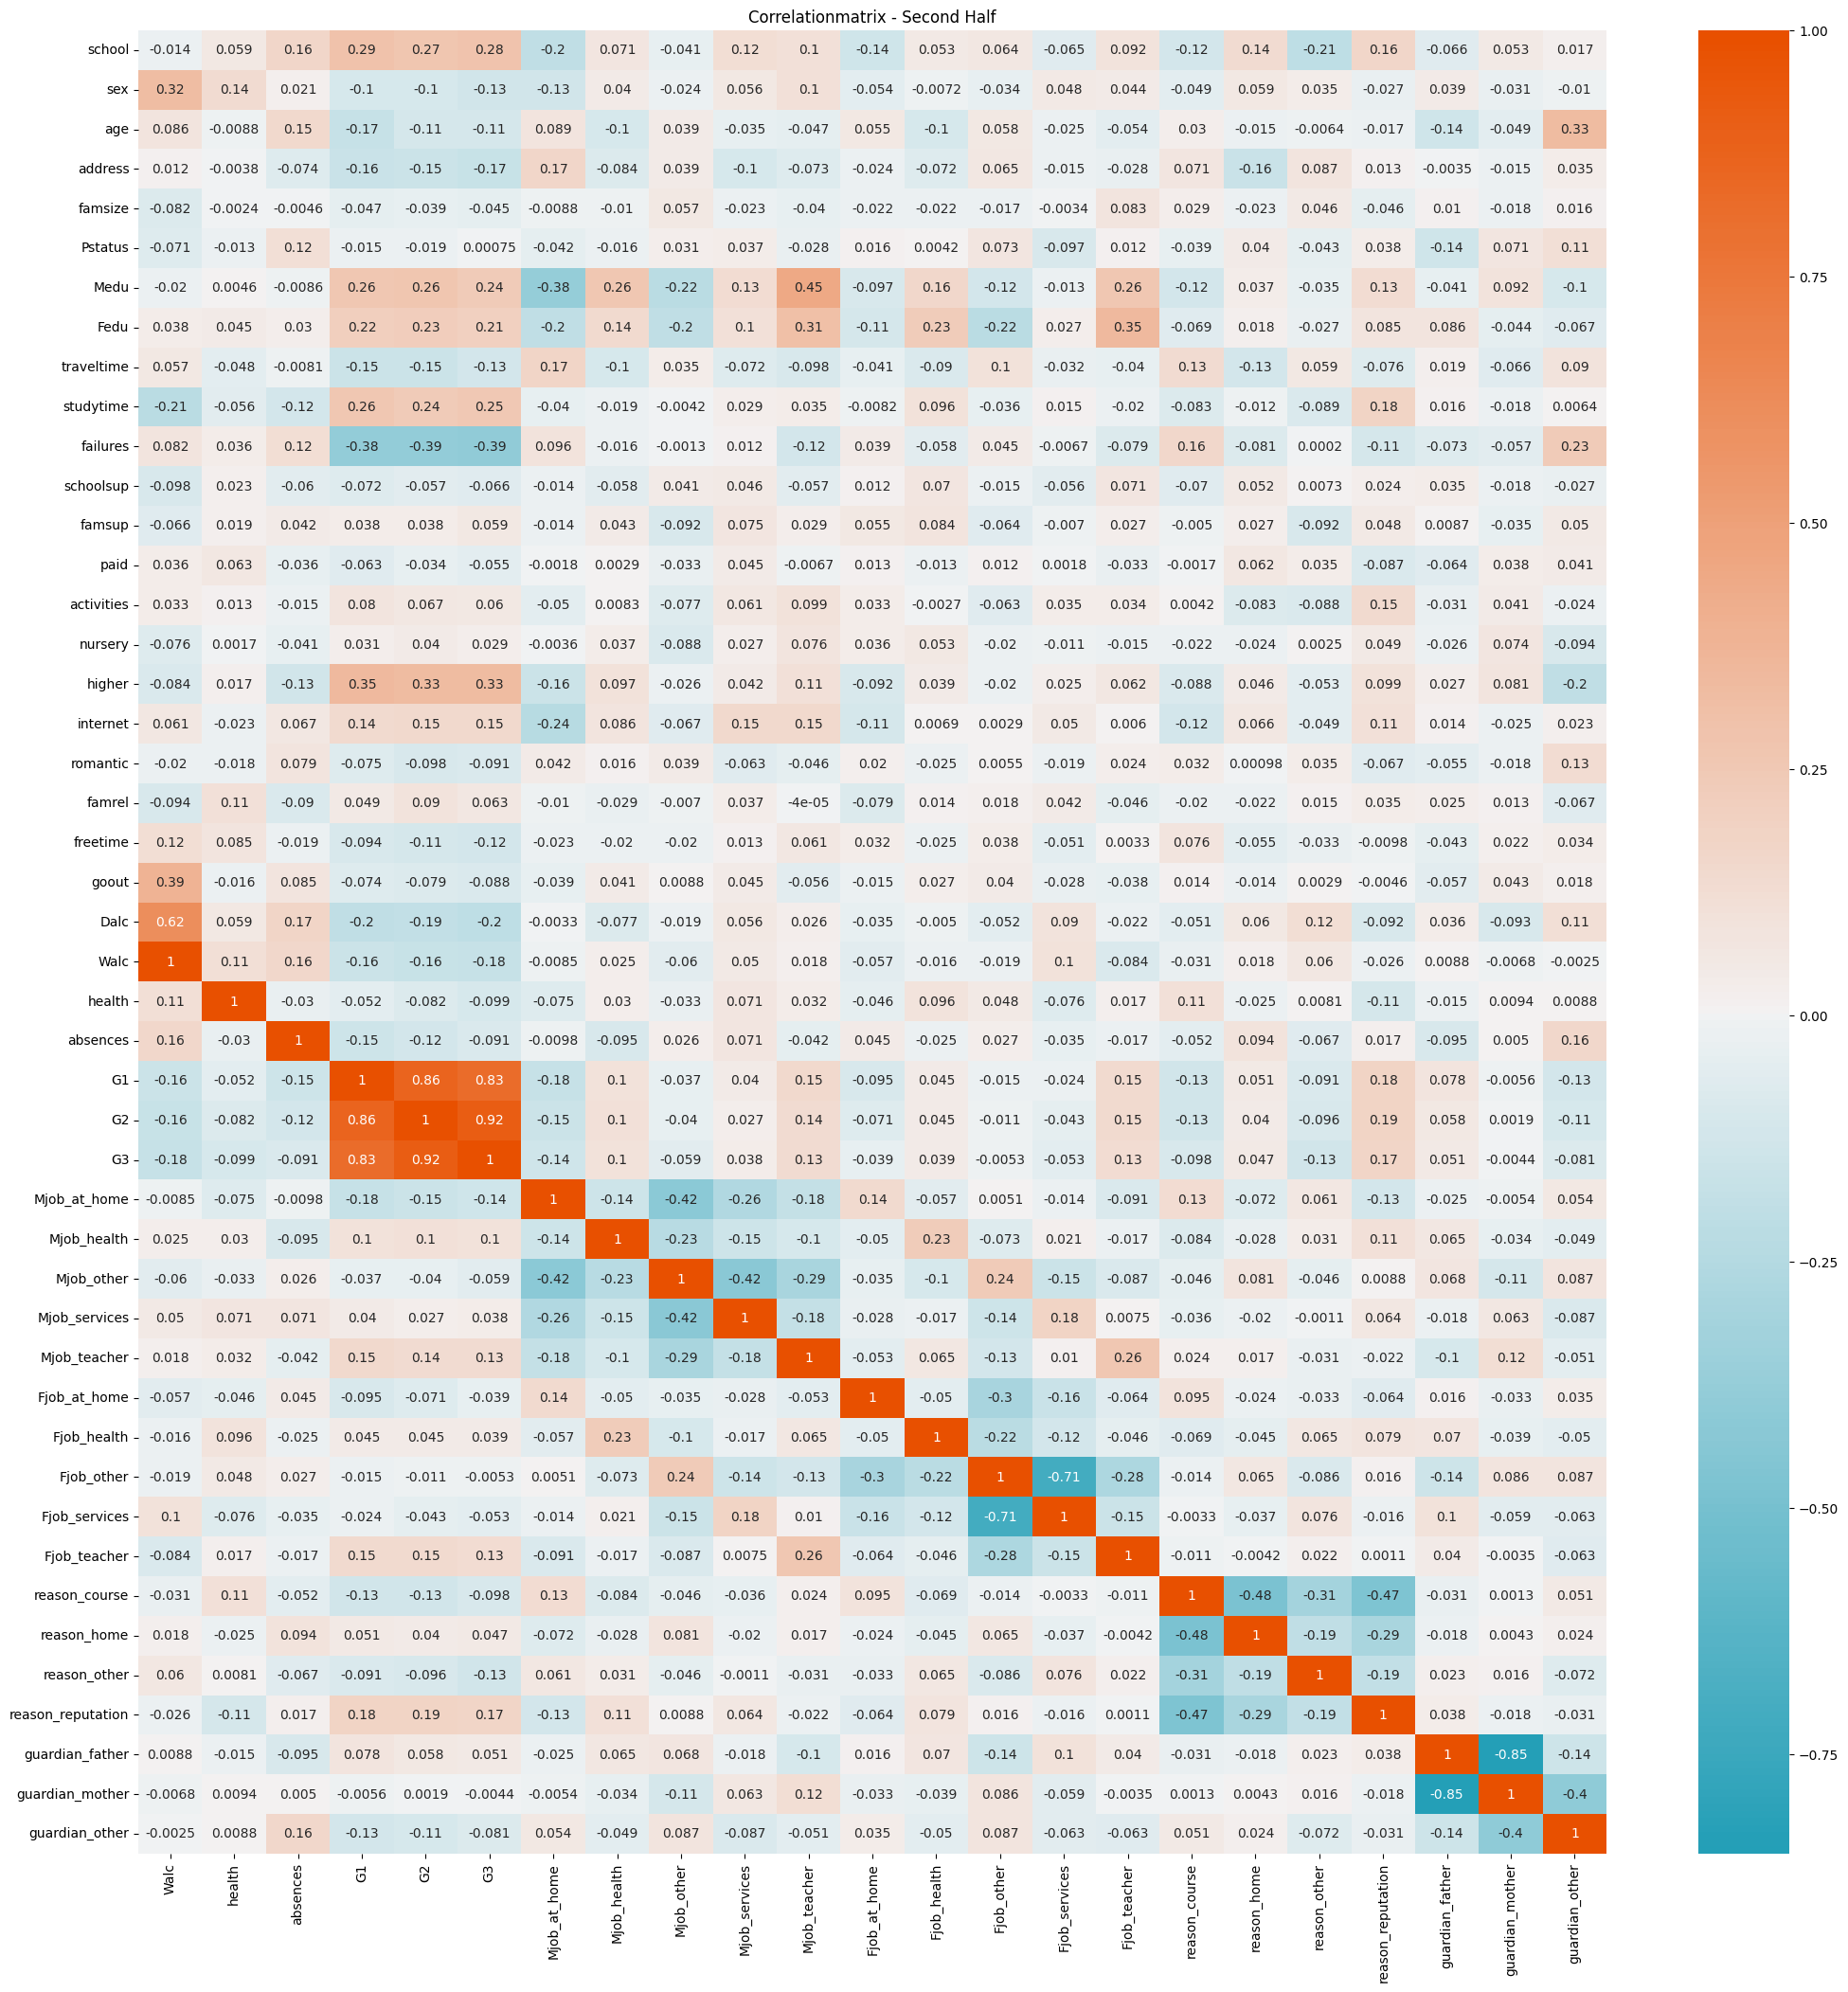

In [20]:
correlation_matrix = df.corr()
half_length = len(correlation_matrix) // 2
first_half = correlation_matrix.iloc[:, :half_length]
second_half = correlation_matrix.iloc[:, half_length:]

plt.figure(figsize=(25, 25))
cmap = sns.diverging_palette(220, 20, s=100, l=55, as_cmap=True)
sns_plot_1 = sns.heatmap(first_half, annot=True, cmap=cmap, center=0)
sns_plot_1.set(title='Correlationmatrix - First Half')
plt.show()

plt.figure(figsize=(25, 25))
sns_plot_2 = sns.heatmap(second_half, annot=True, cmap=cmap, center=0)
sns_plot_2.set(title='Correlationmatrix - Second Half')
plt.show()

In [21]:
correlation_matrix.sort_values('G3', axis=1)

,failures,Dalc,Walc,address,Mjob_at_home,reason_other,sex,traveltime,freetime,age,health,reason_course,absences,romantic,goout,guardian_other,schoolsup,Mjob_other,paid,Fjob_services,famsize,Fjob_at_home,Fjob_other,guardian_mother,Pstatus,nursery,Mjob_services,Fjob_health,reason_home,guardian_father,famsup,activities,famrel,Mjob_health,Fjob_teacher,Mjob_teacher,internet,reason_reputation,Fedu,Medu,studytime,school,higher,G1,G2,G3
school,-0.113788,-0.047169,-0.014169,-0.354520,-0.199124,-0.205220,0.083050,-0.252936,-0.034666,-0.087170,0.058599,-0.122226,0.163933,-0.072241,-0.044632,0.016982,0.123340,-0.040691,0.007905,-0.064697,0.022252,-0.136385,0.063940,0.052590,0.028120,-0.004659,0.122055,0.052641,0.137548,-0.066452,0.063720,0.088604,0.031597,0.070628,0.092356,0.103729,0.240486,0.162282,0.209806,0.254787,0.137857,1.000000,0.136112,0.292626,0.269776,0.284294
sex,0.073888,0.282696,0.320785,-0.025503,-0.133779,0.034816,1.000000,0.040880,0.146305,-0.043662,0.139547,-0.049307,0.021336,-0.110144,0.058178,-0.010358,-0.111202,-0.023970,0.079300,0.047612,-0.098205,-0.053666,-0.034251,-0.030708,-0.064700,-0.043603,0.055879,-0.007233,0.059079,0.039055,-0.129467,0.124707,0.083473,0.039825,0.044416,0.104647,0.065911,-0.027289,0.083913,0.119127,-0.206214,0.083050,-0.058134,-0.104109,-0.104005,-0.129077
age,0.319968,0.134768,0.086357,0.025848,0.088980,-0.006385,-0.043662,0.034490,-0.004910,1.000000,-0.008750,0.030345,0.149998,0.178810,0.112805,0.330353,-0.167841,0.038776,-0.005458,-0.024570,0.002470,0.055275,0.058406,-0.048726,0.005631,-0.021441,-0.034880,-0.103504,-0.014716,-0.136786,-0.101894,-0.054279,-0.020559,-0.100237,-0.054154,-0.046692,0.013115,-0.016565,-0.121050,-0.107832,-0.008415,-0.087170,-0.265497,-0.174322,-0.107119,-0.106505
address,0.063824,0.047304,0.012416,1.000000,0.165307,0.086910,-0.025503,0.344902,0.036647,0.025848,-0.003787,0.070834,-0.073653,0.030939,-0.015475,0.035192,-0.017956,0.038934,0.030483,-0.014508,0.046113,-0.023822,0.064898,-0.015464,-0.094635,-0.018077,-0.101131,-0.072167,-0.161183,-0.003491,-0.005577,0.009278,0.033897,-0.084131,-0.028221,-0.073149,-0.175794,0.012882,-0.141493,-0.190320,-0.062023,-0.354520,-0.076706,-0.157127,-0.154600,-0.167637
famsize,0.066068,-0.060482,-0.081958,0.046113,-0.008830,0.046227,-0.098205,-0.012794,0.021257,0.002470,-0.002448,0.029348,-0.004645,0.032936,0.004312,0.015673,0.056405,0.057439,0.050253,-0.003410,1.000000,-0.021608,-0.016528,-0.017646,-0.239608,-0.100686,-0.022942,-0.021832,-0.023438,0.010049,0.039819,0.014790,-0.004641,-0.010316,0.083334,-0.039768,-0.013357,-0.046385,0.039538,0.014325,0.010945,0.022252,-0.004523,-0.047230,-0.038891,-0.045016
Pstatus,0.009881,-0.041513,-0.070976,-0.094635,-0.042045,-0.042910,-0.064700,-0.040633,-0.037585,0.005631,-0.012638,-0.039014,0.117492,0.053828,-0.031086,0.114559,0.009456,0.030621,-0.015923,-0.097317,-0.239608,0.015675,0.073386,0.070786,1.000000,0.032724,0.037264,0.004180,0.040492,-0.142001,-0.010203,-0.101555,-0.051303,-0.016419,0.011516,-0.027986,-0.059754,0.038142,0.031856,0.057174,0.008748,0.028120,-0.022726,-0.015251,-0.018689,0.000754
Medu,-0.172210,-0.007018,-0.019766,-0.190320,-0.376636,-0.034855,0.119127,-0.265079,-0.019686,-0.107832,0.004614,-0.119602,-0.008577,-0.030992,0.009536,-0.101123,-0.022168,-0.224335,0.113973,-0.012576,0.014325,-0.097313,-0.117551,0.091562,0.057174,0.125951,0.130272,0.155576,0.036580,-0.040792,0.120491,0.119354,0.024421,0.261215,0.258136,0.449847,0.266052,0.132502,0.647477,1.000000,0.097006,0.254787,0.213896,0.260472,0.264035,0.240151
Fedu,-0.165915,0.000061,0.038445,-0.141493,-0.198240,-0.027127,0.083913,-0.208288,0.006841,-0.121050,0.044910,-0.068893,0.029859,-0.067675,0.027690,-0.066684,0.023572,-0.197974,0.094628,0.026575,0.039538,-0.107575,-0.216447,-0.044450,0.031856,0.074863,0.104368,0.227081,0.017710,0.086158,0.135191,0.079700,0.020256,0.140789,0.348874,0.312130,0.183483,0.085076,1.000000,0.647477,0.050400,0.209806,0.191735,0.217501,0.225139,0.211800
traveltime,0.097730,0.092824,0.

In [22]:
# save the dataframe
df.to_csv('data/student-por-processed.csv', index=False)